In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('ds_project_3_train.csv')
df_test = pd.read_csv('ds_project_3_test.csv')

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train = df_train[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']]
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,208500
1,9600,1976,6,8,1262,NaN,460,TA,181500
2,11250,2001,7,5,1786,NaN,608,Gd,223500
3,9550,1915,7,5,1717,NaN,642,Gd,140000
4,14260,2000,8,5,2198,NaN,836,Gd,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,175000
1456,13175,1978,6,6,2073,NaN,500,TA,210000
1457,9042,1941,7,9,2340,Shed,252,Gd,266500
1458,9717,1950,5,6,1078,NaN,240,Gd,142125


In [ ]:
df_test = df_test[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual']]
df_test

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,11622,1961,5,6,896,NaN,730.0,TA
1,14267,1958,6,6,1329,Gar2,312.0,Gd
2,13830,1997,5,5,1629,NaN,482.0,TA
3,9978,1998,6,6,1604,NaN,470.0,Gd
4,5005,1992,8,5,1280,NaN,506.0,Gd
...,...,...,...,...,...,...,...,...
1454,1936,1970,4,7,1092,NaN,0.0,TA
1455,1894,1970,4,5,1092,NaN,286.0,TA
1456,20000,1960,5,7,1224,NaN,576.0,TA
1457,10441,1992,5,5,970,Shed,0.0,TA


In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

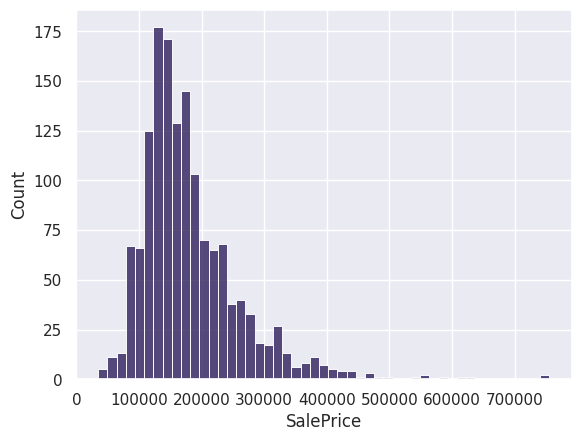

In [ ]:
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice'])

In [ ]:
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

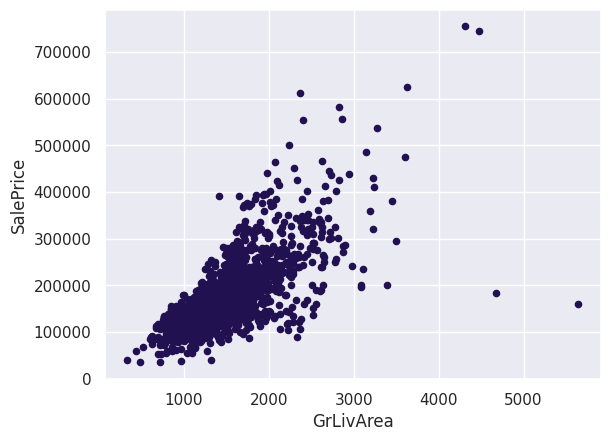

In [ ]:
# data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

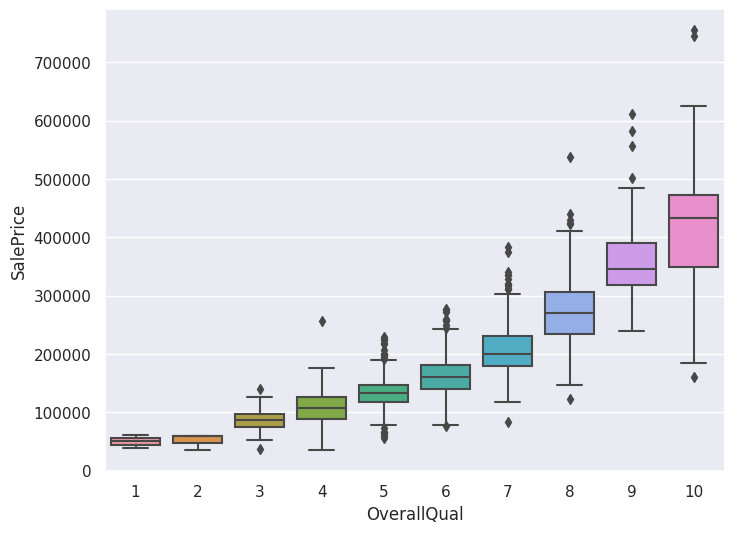

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

In [ ]:
df_train[(df_train['OverallQual']==10)&(df_train['SalePrice']<200000)]

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


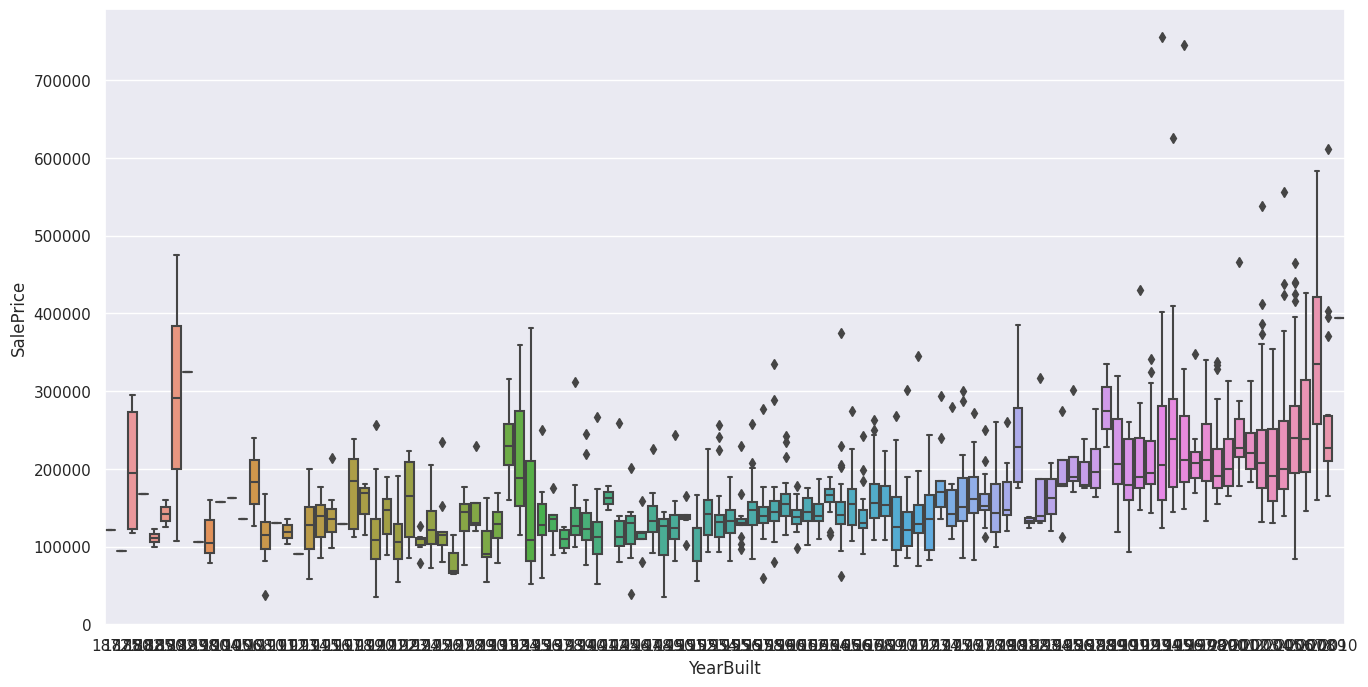

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)

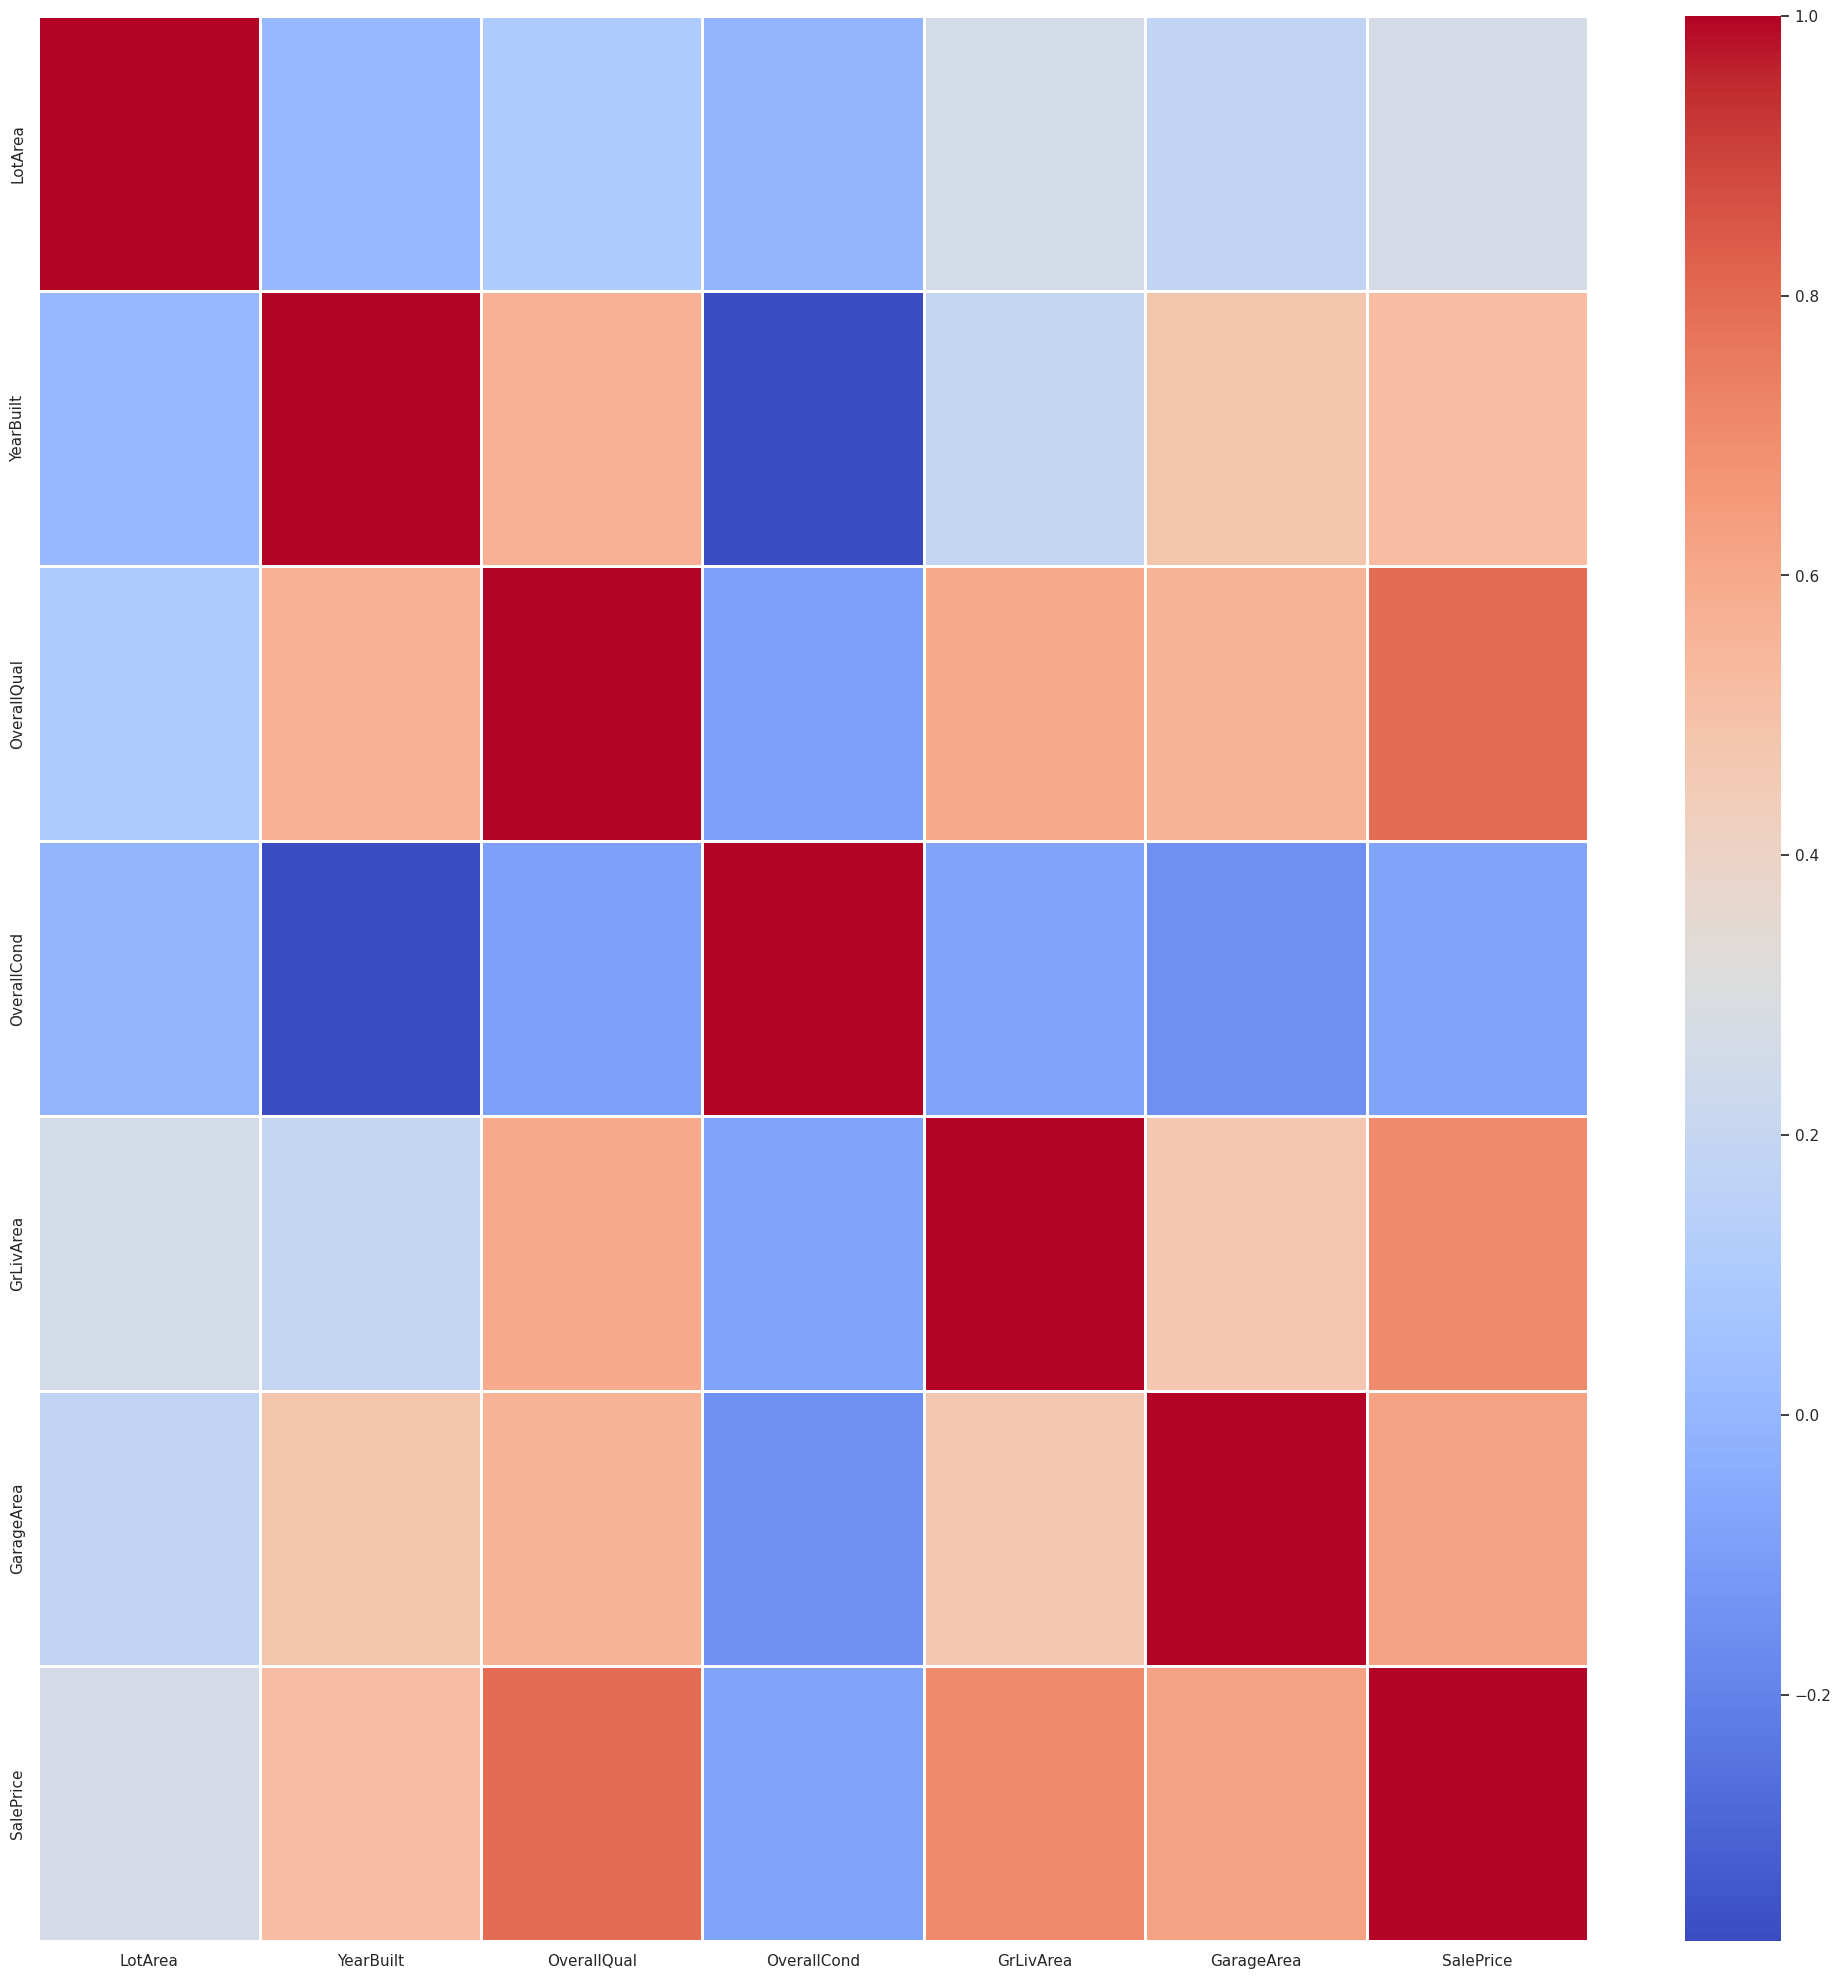

In [ ]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(), cmap = "coolwarm", annot=False, linewidth=2)

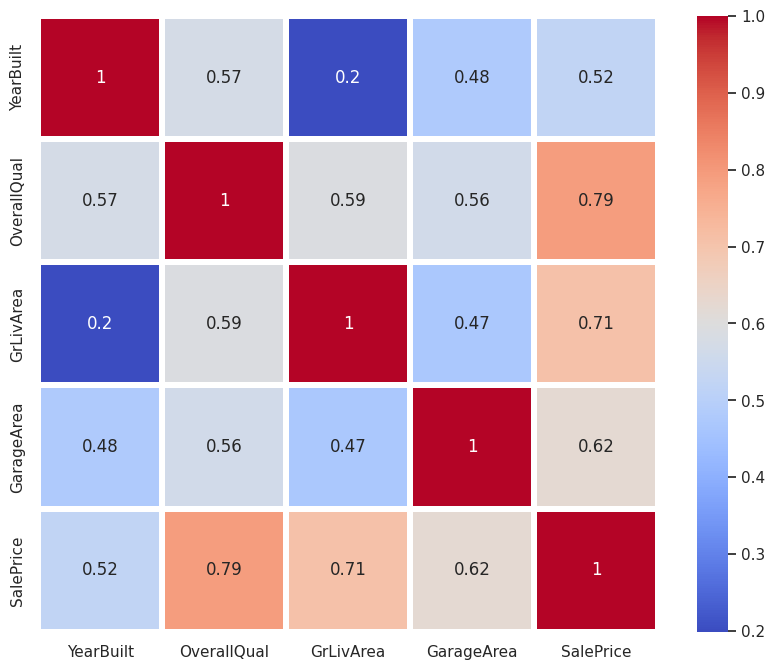

In [ ]:
hig_corr = df_train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

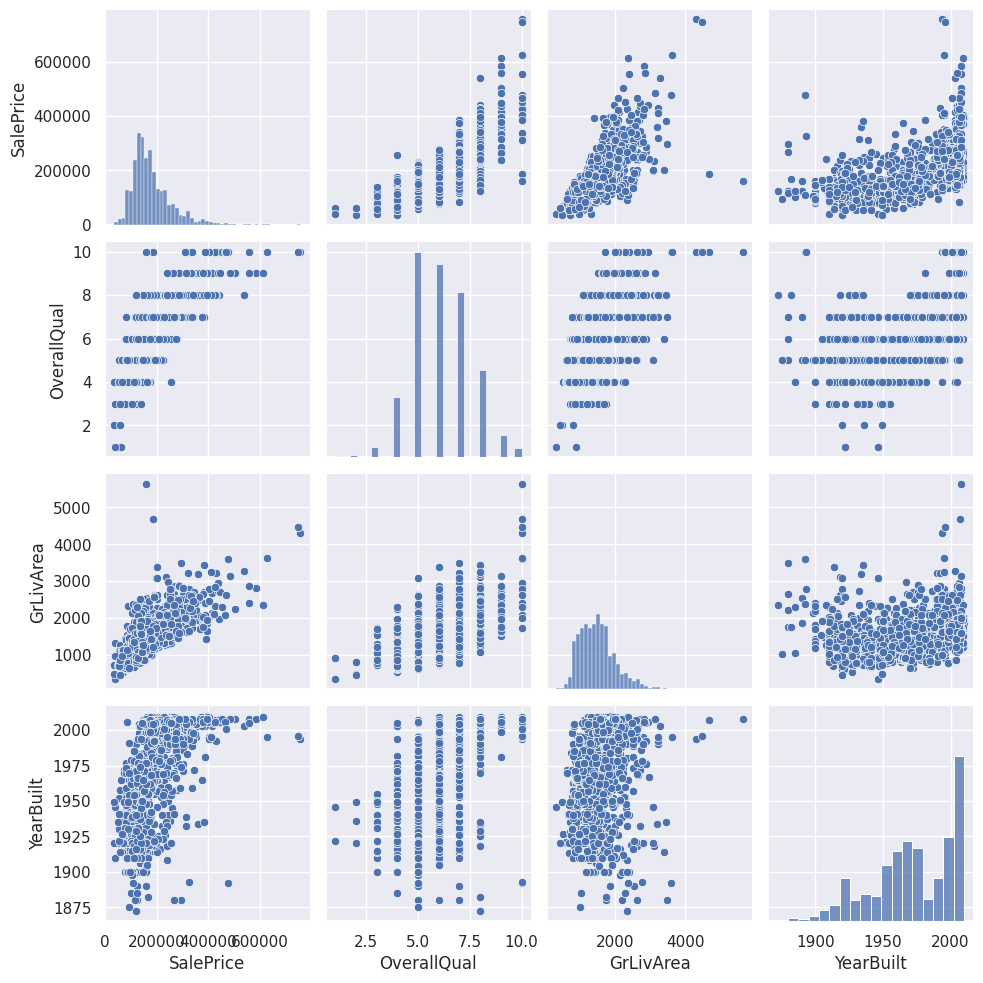

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

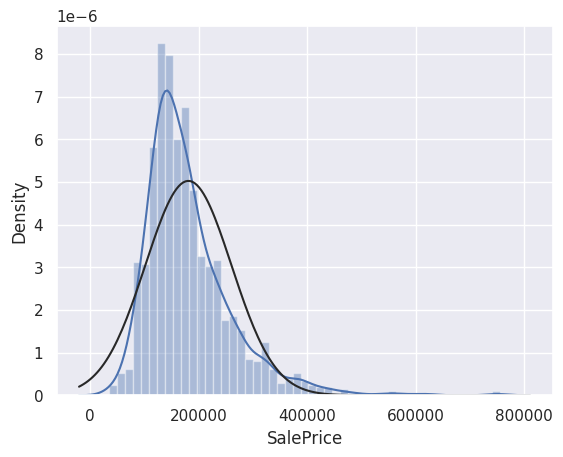

In [ ]:
sns.distplot(df_train['SalePrice'], fit = norm);

# Print Mu dan Sigma
# (mu, sigma) = norm.fit(df_train['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# # Plot Distribusi
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

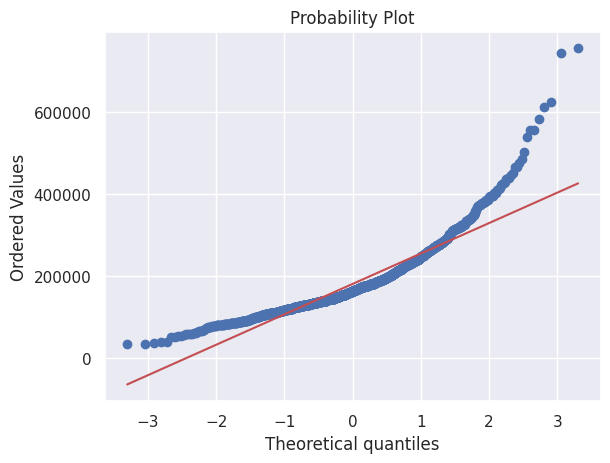

In [ ]:
# QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

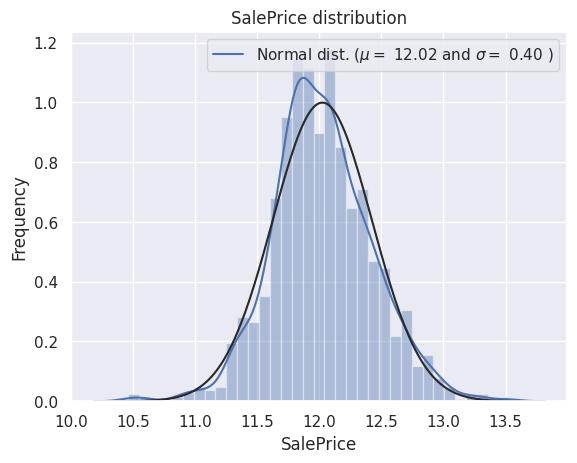

In [ ]:
# We use the numpy function log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# Check the new distribution
sns.distplot(df_train['SalePrice'] , fit=norm);

# Print Mu dan Sigma
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

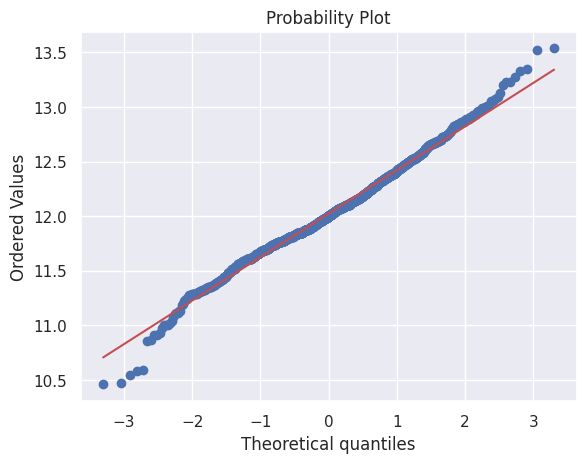

In [ ]:
#QQ Plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [ ]:
print(ntrain, ntest)

1460 1459


In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,0.964029
GarageArea,1,0.000343
KitchenQual,1,0.000343
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000


In [ ]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [ ]:
all_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [ ]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [ ]:
all_data['KitchenQual'].mode()[0]

'TA'

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [ ]:
all_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [ ]:
#Changing OverallCond into a categorical variable
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


## **Feature Engineering**
## ***Label Encoding ***

In [ ]:
tmp_data = all_data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual') #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(tmp_data[c].values))
    tmp_data[c] = lbl.transform(list(tmp_data[c].values))
    encoders[c] = lbl

# shape
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 8)


In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,4,1710,None,548.0,2
1,9600,1976,6,7,1262,None,460.0,3
2,11250,2001,7,4,1786,None,608.0,2
3,9550,1915,7,4,1717,None,642.0,2
4,14260,2000,8,4,2198,None,836.0,2
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,6,1092,None,0.0,3
2915,1894,1970,4,4,1092,None,286.0,3
2916,20000,1960,5,6,1224,None,576.0,3
2917,10441,1992,5,4,970,Shed,0.0,3


In [ ]:
tmp_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

# **Skewness Treatment**

In [ ]:
from scipy.stats import norm, skew

numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


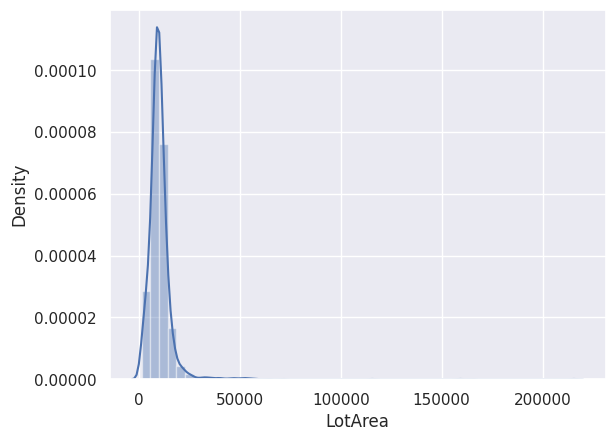

In [ ]:
sns.distplot(tmp_data['LotArea']);

In [ ]:
tmp_data['LotArea'].max()

215245

# **Box Cox Transformation**

In [ ]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 3 skewed numerical features to Box Cox transform


In [ ]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)
skewness

,Skew
LotArea,12.822431
GrLivArea,1.269358
KitchenQual,-1.448023


In [ ]:
skewed_features

Index(['LotArea', 'GrLivArea', 'KitchenQual'], dtype='object')

In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,4.630107,2003,7,4,3.929054,None,548.0,0.869195
1,4.686727,1976,6,7,3.796821,None,460.0,1.051770
2,4.757276,2001,7,4,3.947997,None,608.0,0.869195
3,4.684408,1915,7,4,3.930833,None,642.0,0.869195
4,4.863104,2000,8,4,4.038487,None,836.0,0.869195
...,...,...,...,...,...,...,...,...
2914,3.983140,1970,4,6,3.733890,None,0.0,1.051770
2915,3.973580,1970,4,4,3.733890,None,286.0,1.051770
2916,5.014915,1960,5,6,3.783522,None,576.0,1.051770
2917,4.724057,1992,5,4,3.682373,Shed,0.0,1.051770


# **Skewness after Box Cox Transformation**

In [ ]:
# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
GarageArea,0.239257
GrLivArea,0.016426
OverallQual,-0.326653
LotArea,-0.433513
YearBuilt,-0.599806
KitchenQual,-2.572851


<Axes: xlabel='LotArea', ylabel='Density'>

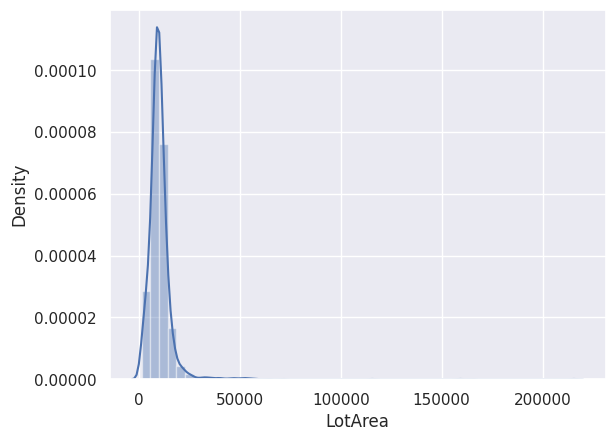

In [ ]:
sns.distplot(all_data['LotArea'])

In [ ]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True)
print(tmp_data.shape)

(2919, 11)


In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,4.630107,2003,7,4,3.929054,548.0,0.869195,1,0,0,0
1,4.686727,1976,6,7,3.796821,460.0,1.051770,1,0,0,0
2,4.757276,2001,7,4,3.947997,608.0,0.869195,1,0,0,0
3,4.684408,1915,7,4,3.930833,642.0,0.869195,1,0,0,0
4,4.863104,2000,8,4,4.038487,836.0,0.869195,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2914,3.983140,1970,4,6,3.733890,0.0,1.051770,1,0,0,0
2915,3.973580,1970,4,4,3.733890,286.0,1.051770,1,0,0,0
2916,5.014915,1960,5,6,3.783522,576.0,1.051770,1,0,0,0
2917,4.724057,1992,5,4,3.682373,0.0,1.051770,0,0,1,0


In [ ]:
one_hot_columns = tmp_data.columns

# **Scaling**

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

NameError: ignored

# **Split Train Test**

In [ ]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

# **Modelling**

# **Kfold and Evaluation Score**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

# **Linear Regression**

In [ ]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8293440623005908]

# **Lasso Regression**

In [ ]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8301828430153648]

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8335376620938075]

# **XGBoost**

In [ ]:
!pip install --upgrade xgboost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8276770791754363]

In [ ]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


# **Coba Prediksi Data Baru**

In [ ]:
model = xgb_reg.fit(X_train, y_train)

In [ ]:
model.predict(tmp_data[0].reshape(1,-1))

array([12.247966], dtype=float32)

In [ ]:
np.expm1(12.247966)

208555.6529293021

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   object 
 3   OverallCond  2919 non-null   object 
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 182.6+ KB


In [ ]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [ ]:
data_baru = {'LotArea': [8450],
             'YearBuilt':[2003],
             'OverallQual':['7'],
             'OverallCond':['5'],
             'GrLivArea':[1710],
            'MiscFeature':['None'],
             'GarageArea': [548],
             'KitchenQual': ['Gd']}

In [ ]:
tmp = pd.DataFrame(data_baru)
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548,Gd


In [ ]:
data_baru['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0]
data_baru['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
data_baru['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]

In [ ]:
data_baru['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
data_baru['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
data_baru['KitchenQual'] = boxcox1p(data_baru['KitchenQual'], lam)

In [ ]:
data_baru

{'LotArea': 25.503637040790046,
 'YearBuilt': [2003],
 'OverallQual': 7,
 'OverallCond': 4,
 'GrLivArea': 17.162564178531092,
 'MiscFeature': ['None'],
 'GarageArea': [548],
 'KitchenQual': 1.2286546980775868}

In [ ]:
tmp = pd.DataFrame(data_baru)

In [ ]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])

In [ ]:
one_hot_columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [ ]:
# Menambahkan kolom-kolom yang hilang pada data baru
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548,1.228655,1,0,0,0


In [ ]:
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [ ]:
y = np.expm1(model.predict(tmp_scaled))
print(y)

[317152.44]
